# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import os

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# load label names to use in prediction results
label_list_path = 'datasets/cifar-10-batches-py/batches.meta'

keras_dir = os.path.expanduser(os.path.join('~', '.keras'))
datadir_base = os.path.expanduser(keras_dir)
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.spath.join('/tmp', '.keras')
label_list_path = os.path.join(datadir_base, label_list_path)

with open(label_list_path, mode='rb') as f:
    labels = pickle.load(f)['label_names']
print("Loaded label names from %s" % label_list_path)

Using TensorFlow backend.


Untaring file...
Loaded label names from /home/carnd/.keras/datasets/cifar-10-batches-py/batches.meta


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of classes =", n_classes)

Number of training examples = 50000
Number of testing examples = 10000
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

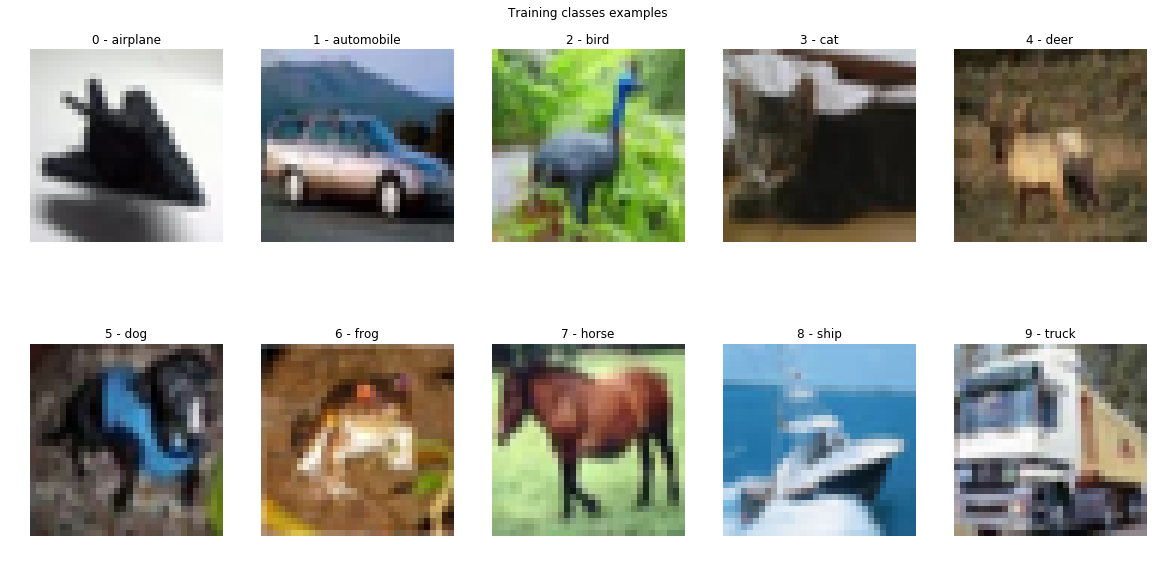

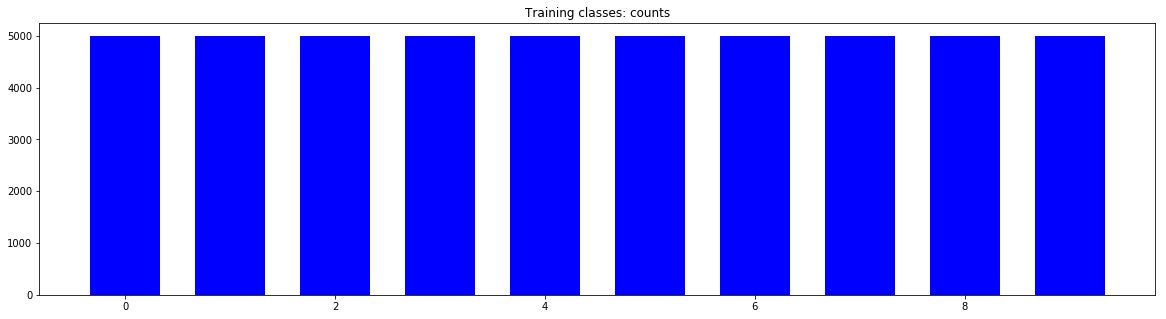

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def get_examples_per_class():
    u, indices = np.unique(y_train, return_index=True)
    examples =[]
    
    for i in range(1, len(indices) + 1):
        img = X_train[indices[i - 1]]
        label = y_train[indices[i - 1]]
        label_string = labels[label]
        examples.append([img, label, label_string])
    
    return examples

def show_class_examples(examples_per_class):
    #Plot an example for each class
    columns = 5
    rows = np.ceil(len(examples_per_class)/columns)

    fig = plt.figure(figsize = (columns * 4, rows * 2));
    plt.title("Training classes examples")
    plt.axis('off')
    plt.subplots_adjust(top=2)
    for i in range(0, len(examples_per_class)):
        example = examples_per_class[i]
        img = example[0]
        label = example[1]
        label_string = example[2]
        ax = fig.add_subplot(rows, columns, i + 1)
        plt.title("{0} - {1}".format(label, label_string))
        ax.imshow(img) if img.shape[2] == 3 else ax.imshow(img[:,:,0], cmap='gray')
        ax.axis('off')
#     fig.tight_layout()
    
        
def plot_examples_per_class(y, title):
    fig = plt.figure(figsize = (20,5));
    plt.title(title)
    unique_elements, counts_elements = np.unique(y, return_counts=True)
    train_examples_per_class = list(zip(unique_elements, counts_elements))
    width = 1/1.5
    x = unique_elements
    y = counts_elements
    plt.bar(x, y, width, color="blue")
        
examples_per_class = get_examples_per_class()
show_class_examples(examples_per_class)
plot_examples_per_class(y_train, "Training classes: counts")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

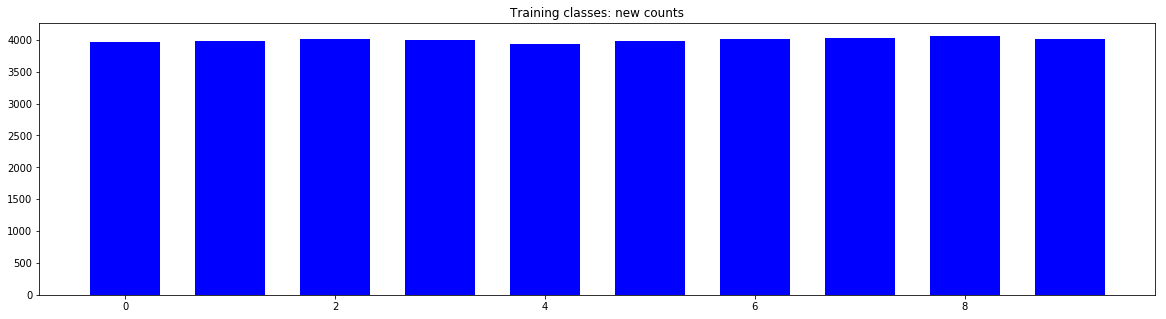

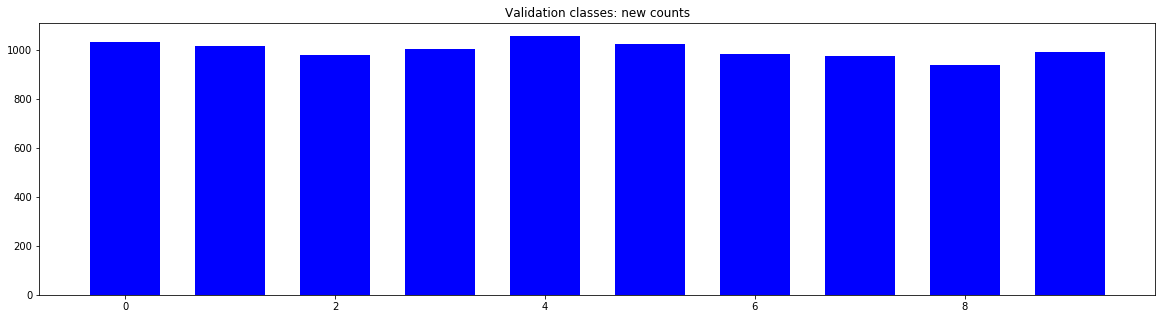

In [4]:
# Generate some data
import sys
import random
import math
import scipy
import numpy as np
from skimage.transform import warp, AffineTransform

# def rotate_image(image, angle=10):
#     return scipy.ndimage.rotate(image, random.randint(-angle,angle), reshape=False)

# def shear_image(image):
#     shear = random.randint(1,2) / 10
#     tform = AffineTransform(shear=shear)
#     return warp(image, tform, preserve_range=True).astype(int)

# def scale_image(image):
#     sx = 1 - random.randint(1,2) / 10
#     sy = 1 - random.randint(1,2) / 10
#     tform = AffineTransform(scale=(sx, sy))
#     return warp(image, tform, preserve_range=True).astype(int)

# def translate_image(image):
#     tx = random.randint(0,3)
#     ty = random.randint(0,3)
#     tform = AffineTransform(translation=(tx, ty))
#     return warp(image, tform, preserve_range=True).astype(int)

# def transform_image(image):
#     transformations = {
#         0: rotate_image,
#         1: shear_image,
#         2: scale_image,
#         3: translate_image
#     }
#     return transformations[random.randint(0, len(transformations) - 1)](image)

# # level the numbers per class
# new_trainX = []
# new_trainY = []
# target_size = 4000
# max_size = target_size

# def extend_image_set(samples):
#     expanded = []
#     expanded.extend(samples)

#     sample_size = len(samples)
#     new_size = sample_size
#     while True:
#         for image in samples:
#             expanded.append(transform_image(image))
#             new_size += 1
#             if  new_size >= target_size:
#                 return expanded

# sys.stdout.write("Processing images for class: ")

# # Concatenate train and validation sets
# X_train = np.concatenate((X_train, X_valid))
# y_train = np.concatenate((y_train, y_valid))

# # Augment data
# for i in range(0,43):
#     sys.stdout.write("{0}..".format(i))
#     samples = X_train[np.where(y_train == i)]
#     sample_size = samples.shape[0]
#     if (sample_size < target_size):
#         samples = np.array(extend_image_set(samples))
#     elif (sample_size > max_size):
#         samples = samples[0:max_size]
#     new_trainY.append(np.full((samples.shape[0]), i).flatten())
#     new_trainX.append(samples)
    
# sys.stdout.write('done\n')
# sys.stdout.flush()

# new_sample_length = sum([len(x) for x in new_trainX])
# y_train = np.concatenate(new_trainY)
# X_train = np.concatenate(new_trainX)

# Split train and validation sets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Plot new sets
plot_examples_per_class(y_train, "Training classes: new counts")
plot_examples_per_class(y_valid, "Validation classes: new counts")

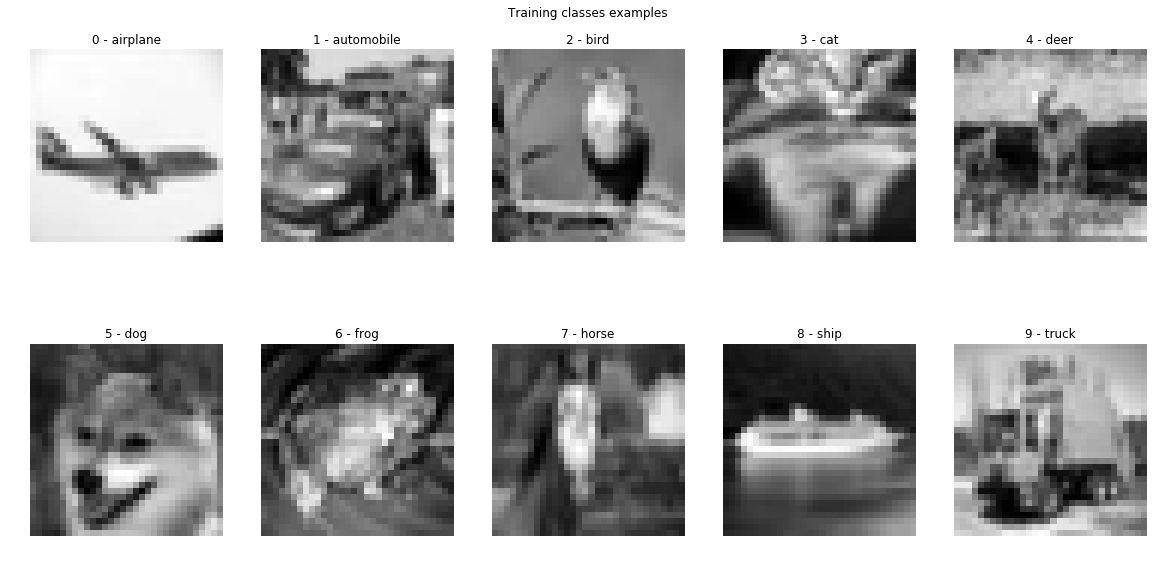

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np

def toFloat(X):
    return X.astype(np.float32)

def normalise(X):
    return (X  - 128) / 128

def grayscale(X):
    return np.reshape(np.mean(X, axis=3), (X.shape[0], X.shape[1], X.shape[2], 1))

def preprocess(X):
    return normalise(grayscale(toFloat(X)))

X_train, X_valid, X_test = [preprocess(X) for X in [X_train, X_valid, X_test]]

show_class_examples(get_examples_per_class())

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def model(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1_0') + conv1_b
    conv1 = tf.nn.relu(conv1, name='conv1_1')
#     conv1 = tf.nn.dropout(conv1, keep_prob) Adding dropout to the convolutional layers is not helpful
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_2')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2_0') + conv2_b
    conv2 = tf.nn.relu(conv2, name='conv2_1')
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_2')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1, name='fc1')
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 200. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2, name='fc2')
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 200. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    fc3 = tf.nn.relu(fc3, name='fc3')
    fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer 6: Fully Connected. Input = 84. Output = 10.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc3, fc4_W) + fc4_b

    return logits, tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle

# EPOCHS = 10
# BATCH_SIZE = 128
EPOCHS = 60
BATCH_SIZE = 128
KEEP_PROB = 0.5 # Keep probability for dropout <- todo lower
BETA = 0.0001 # Beta for L2 regularization <- todo lower factor 10

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 10)

# Training pipeline
rate = 0.0005
#rate = 0.001

logits, reg = model(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) + reg * BETA
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train
accuracy = {'training': [], 'validation':[]}
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    highest_accuracy = 0
    for i in range(EPOCHS):
        print("EPOCH {}".format(i+1))
        print("Training...")
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        print("Evaluating...".format(i+1))
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy["training"].append(training_accuracy);
        accuracy["validation"].append(validation_accuracy);
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        # Only save the highest accuracy
        if validation_accuracy > highest_accuracy:
            highest_accuracy = validation_accuracy
            
            saver.save(sess, './model')
            print("Model saved")
            
        print()




Training...

EPOCH 1
Training...
Evaluating...
Training Accuracy = 0.333
Validation Accuracy = 0.335
Model saved

EPOCH 2
Training...
Evaluating...
Training Accuracy = 0.399
Validation Accuracy = 0.401
Model saved

EPOCH 3
Training...
Evaluating...
Training Accuracy = 0.434
Validation Accuracy = 0.432
Model saved

EPOCH 4
Training...
Evaluating...
Training Accuracy = 0.461
Validation Accuracy = 0.453
Model saved

EPOCH 5
Training...
Evaluating...
Training Accuracy = 0.480
Validation Accuracy = 0.466
Model saved

EPOCH 6
Training...
Evaluating...
Training Accuracy = 0.499
Validation Accuracy = 0.479
Model saved

EPOCH 7
Training...
Evaluating...
Training Accuracy = 0.512
Validation Accuracy = 0.494
Model saved

EPOCH 8
Training...
Evaluating...
Training Accuracy = 0.529
Validation Accuracy = 0.508
Model saved

EPOCH 9
Training...
Evaluating...
Training Accuracy = 0.544
Validation Accuracy = 0.516
Model saved

EPOCH 10
Training...
Evaluating...
Training Accuracy = 0.554
Validation Accura

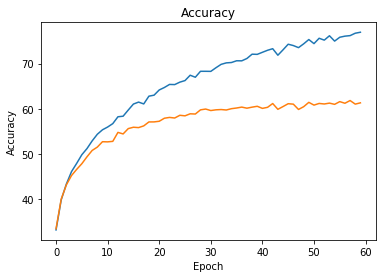

In [8]:
plt.plot([100 * x for x in accuracy["training"]])
plt.plot([100 * x for x in accuracy["validation"]])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [9]:
with tf.Session() as sess:
    saver.restore(sess, "./model")
    print("Test accuracy: ", evaluate(X_test, y_test))

Test accuracy:  0.6134
